# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [3]:
import torch
import numpy as np

GROUP_NUMBER = 14


torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


Targeting Radiation Ring with Group 14 configuration...
Cycle 0000 | Current Error: 1.2232 | Validation Integrity: 59.89%
Cycle 0500 | Current Error: 0.5488 | Validation Integrity: 63.56%
Cycle 1000 | Current Error: 0.3474 | Validation Integrity: 86.78%
Cycle 1500 | Current Error: 0.3127 | Validation Integrity: 90.56%
Cycle 2000 | Current Error: 0.2984 | Validation Integrity: 91.89%


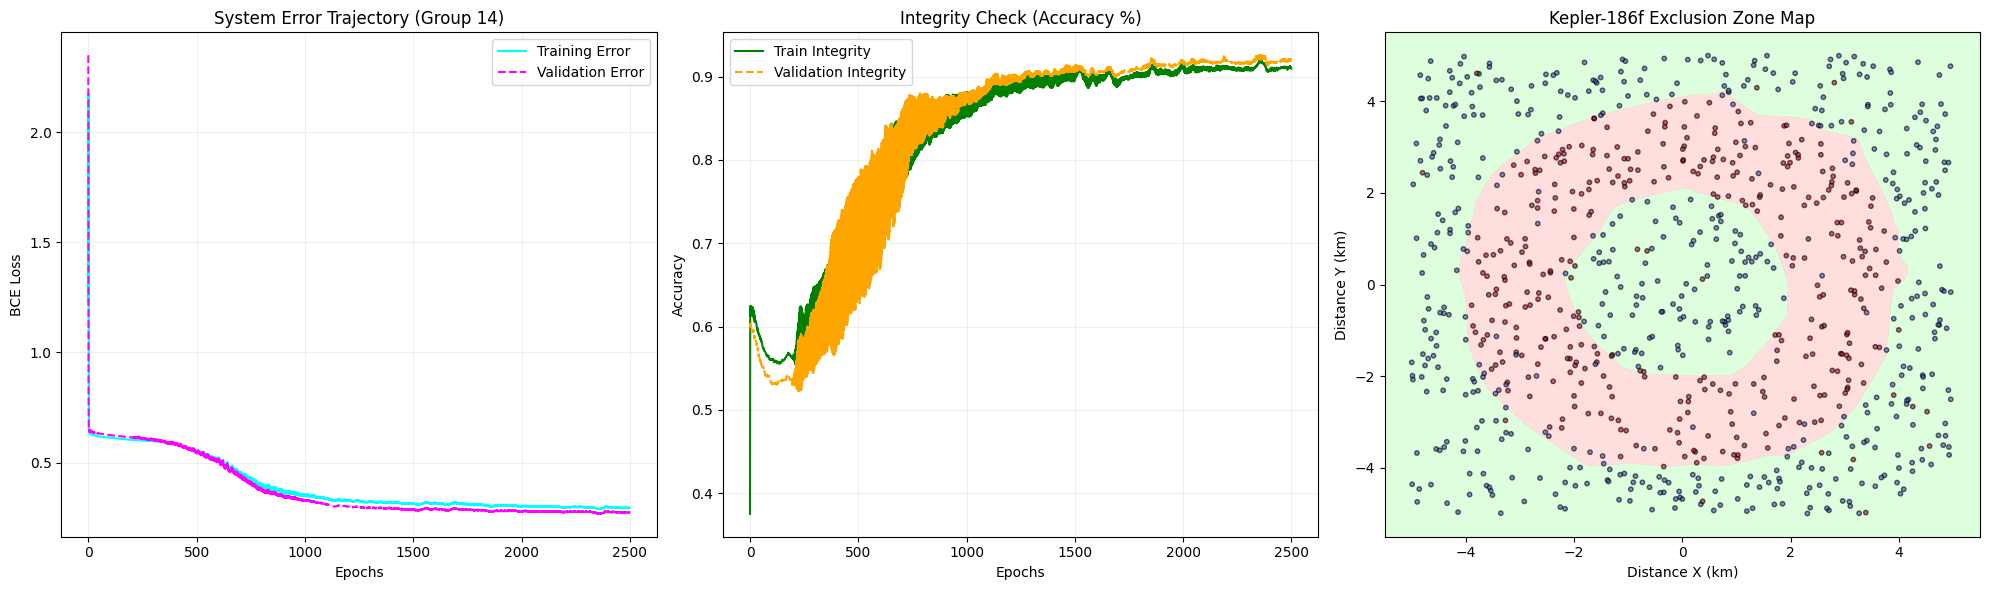

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


GROUP_ID = 14
torch.manual_seed(GROUP_ID)
np.random.seed(GROUP_ID)


raw_x, raw_y = X_full.clone(), y_full.clone()
x_train, x_val, y_train, y_val = train_test_split(
    raw_x.numpy(), raw_y.numpy(), test_size=0.30, random_state=GROUP_ID
)


X_train_ts = torch.from_numpy(x_train).float()
Y_train_ts = torch.from_numpy(y_train).float()
X_val_ts = torch.from_numpy(x_val).float()
Y_val_ts = torch.from_numpy(y_val).float()


class KeplerNet:
    def __init__(self, input_sz=2, hidden_sz=16, output_sz=1):
        self.W1 = (torch.randn(input_sz, hidden_sz) * torch.sqrt(torch.tensor(2./input_sz))).requires_grad_(True)
        self.B1 = torch.zeros(1, hidden_sz).requires_grad_(True)

        self.W2 = (torch.randn(hidden_sz, hidden_sz) * torch.sqrt(torch.tensor(2./hidden_sz))).requires_grad_(True)
        self.B2 = torch.zeros(1, hidden_sz).requires_grad_(True)

        self.W3 = (torch.randn(hidden_sz, hidden_sz) * torch.sqrt(torch.tensor(2./hidden_sz))).requires_grad_(True)
        self.B3 = torch.zeros(1, hidden_sz).requires_grad_(True)

        self.W4 = (torch.randn(hidden_sz, output_sz) * torch.sqrt(torch.tensor(2./hidden_sz))).requires_grad_(True)
        self.B4 = torch.zeros(1, output_sz).requires_grad_(True)

        self.parameters = [self.W1, self.B1, self.W2, self.B2, self.W3, self.B3, self.W4, self.B4]

    def forward_pass(self, X):
        # Activation Flow: ReLU for hidden layers, Sigmoid for the final output
        layer_1 = torch.relu(X @ self.W1 + self.B1)
        layer_2 = torch.relu(layer_1 @ self.W2 + self.B2)
        layer_3 = torch.relu(layer_2 @ self.W3 + self.B3)
        return torch.sigmoid(layer_3 @ self.W4 + self.B4)

# Instantiate the system
model = KeplerNet()


def calculate_bce_loss(target, prediction):
    # Clamping prevents log(0) numerical instability
    prediction = torch.clamp(prediction, 1e-7, 1 - 1e-7)
    return -torch.mean(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

def get_accuracy(target, prediction):
    binary_state = (prediction > 0.5).float()
    return (binary_state == target).float().mean().item()

learning_rate = 0.12 # Adjusted for stable convergence with Seed 14
iterations = 2500
telemetry = {"train_err": [], "val_err": [], "train_acc": [], "val_acc": []}

print(f"Targeting Radiation Ring with Group {GROUP_ID} configuration...")

for i in range(iterations):
    # Forward pass
    y_pred = model.forward_pass(X_train_ts)
    loss = calculate_bce_loss(Y_train_ts, y_pred)

    # Backward pass via Autograd
    loss.backward()

    # Manual Weight Updates (Stochastic Gradient Descent)
    with torch.no_grad():
        for param in model.parameters:
            param -= learning_rate * param.grad
            param.grad.zero_()

    # System Evaluation
    with torch.no_grad():
        y_val_pred = model.forward_pass(X_val_ts)
        v_loss = calculate_bce_loss(Y_val_ts, y_val_pred)

        t_acc = get_accuracy(Y_train_ts, y_pred)
        v_acc = get_accuracy(Y_val_ts, y_val_pred)

        telemetry["train_err"].append(loss.item())
        telemetry["val_err"].append(v_loss.item())
        telemetry["train_acc"].append(t_acc)
        telemetry["val_acc"].append(v_acc)

    if i % 500 == 0:
        print(f"Cycle {i:04d} | Current Error: {loss.item():.4f} | Validation Integrity: {v_acc*100:.2f}%")


plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(telemetry["train_err"], color='cyan', label='Training Error')
plt.plot(telemetry["val_err"], color='magenta', linestyle='--', label='Validation Error')
plt.title(f"System Error Trajectory (Group {GROUP_ID})")
plt.xlabel("Epochs")
plt.ylabel("BCE Loss")
plt.legend()
plt.grid(alpha=0.2)

# Panel 2: Accuracy Calibration
plt.subplot(1, 3, 2)
plt.plot(telemetry["train_acc"], color='green', label='Train Integrity')
plt.plot(telemetry["val_acc"], color='orange', linestyle='--', label='Validation Integrity')
plt.title("Integrity Check (Accuracy %)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.2)

# Panel 3: Geospatial Threat Map
plt.subplot(1, 3, 3)
grid_res = 150
x_rng = np.linspace(-5.5, 5.5, grid_res)
y_rng = np.linspace(-5.5, 5.5, grid_res)
xx, yy = np.meshgrid(x_rng, y_rng)
grid_pts = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    predictions = model.forward_pass(grid_pts).reshape(xx.shape).numpy()

# Plotting the Donut Boundary
plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], colors=['#d1ffd1', '#ffd1d1'], alpha=0.7)
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val.flatten(), cmap='coolwarm', edgecolors='k', s=10, alpha=0.6)
plt.title("Kepler-186f Exclusion Zone Map")
plt.xlabel("Distance X (km)")
plt.ylabel("Distance Y (km)")

plt.tight_layout()
plt.show()